# Neural Networks to Classify Images

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
# Load Data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [3]:
train_images.shape

(50000, 32, 32, 3)

There are 50,000 training images, each being 32 by 32 pixels.
For classification, I create a list to translate the one-hot encoding to labels.

In [26]:
names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

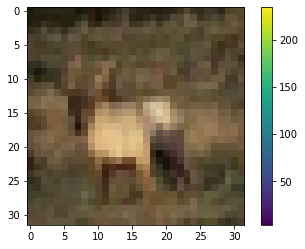

In [9]:
# Example of an Image
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

### Data Preprocessing

In [10]:
# the pixel values right now are on a scale of 0-255. To make it easier to process for the neural network, 
# I reduce the scale to 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0

## Multi-Layer Perceptron NN
### Building the Model

In [54]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(128, activation = 'relu'), # hidden layer (3)
    keras.layers.Dense(10, activation='softmax') # output layer (5)
])

In [55]:
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Running the Model

In [50]:
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8347 - accuracy: 0.3316
Epoch 2/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6597 - accuracy: 0.4035
Epoch 3/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5656 - accuracy: 0.4374
Epoch 4/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5144 - accuracy: 0.4605
Epoch 5/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4752 - accuracy: 0.4716
Epoch 6/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4429 - accuracy: 0.4822
Epoch 7/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4163 - accuracy: 0.4930
Epoch 8/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3923 - accuracy: 0.5014
Epoch 9/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3686 - accuracy: 0.5104
Epoch 10/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.353

In [51]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.4219 - accuracy: 0.4989
Test accuracy: 0.49889999628067017


Pick a number:  3


1/1 [==============================] - 0s 37ms/step


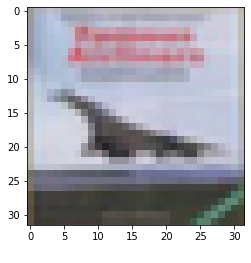

Expected:airplane
Guess:frog


In [56]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    prediction = model.predict(np.array([image]))
    predicted_class = names[np.argmax(prediction)]

    show_image(image, names[correct_label], predicted_class)


def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.xlabel("Guess: " + guess)
    plt.grid(False)
    plt.show()
    print('Expected:' + label)
    print('Guess:' + guess)


def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 1000:
                return int(num)
        else:
            print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num][0]
predict(model, image, label)


# Convolutional Neural Network
### Building the Model

In [58]:
cnn = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [59]:
# compile the model
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [60]:
cnn.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 28s 18ms/step - loss: 1.5269 - accuracy: 0.4398
Epoch 2/15
1563/1563 [==============================] - 27s 17ms/step - loss: 1.1414 - accuracy: 0.5939
Epoch 3/15
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9921 - accuracy: 0.6503
Epoch 4/15
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8910 - accuracy: 0.6856
Epoch 5/15
1563/1563 [==============================] - 27s 18ms/step - loss: 0.8286 - accuracy: 0.7096
Epoch 6/15
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7688 - accuracy: 0.7316
Epoch 7/15
1563/1563 [==============================] - 27s 18ms/step - loss: 0.7235 - accuracy: 0.7447
Epoch 8/15
1563/1563 [==============================] - 29s 18ms/step - loss: 0.6848 - accuracy: 0.7595
Epoch 9/15
1563/1563 [==============================] - 31s 20ms/step - loss: 0.6446 - accuracy: 0.7748
Epoch 10/15
1563/1563 [==============================] - 29s 19m

### Running the Model

In [63]:
test_loss, test_acc = cnn.evaluate(test_images,  test_labels, verbose=1) 
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 1.0288 - accuracy: 0.7007
Test accuracy: 0.7006999850273132


Pick a number:  100


1/1 [==============================] - 0s 124ms/step


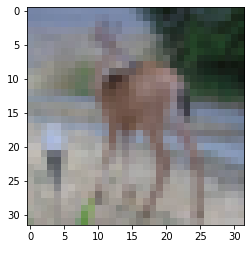

Expected:deer
Guess:deer


In [76]:
def predict2(model, image, correct_label):
    names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    prediction = model.predict(np.array([image]))
    predicted_class = names[np.argmax(prediction)]

    show_image(image, names[correct_label], predicted_class)
num = get_number()
image = test_images[num]
label = test_labels[num][0]
predict2(cnn, image, label)